 Consider the heart-disease.csv dataset available at the course webpage’s homework tab.
 Using sklearn, apply a 5-fold stratified cross-validation with shuffling (random_state=0) for the assessment of predictive models along this section.
 1) Compare the performance of a 𝑘𝑁𝑁 with 𝑘 = 5 and a naïve Bayes with Gaussian assumption (consider all remaining parameters as default):
 a. [1.0v] Plot two boxplots with the fold accuracies for each classifier. Is there one more stable than the other regarding performance? Why do you think that is the case? Explain.

Text(0, 0.5, 'Accuracy')

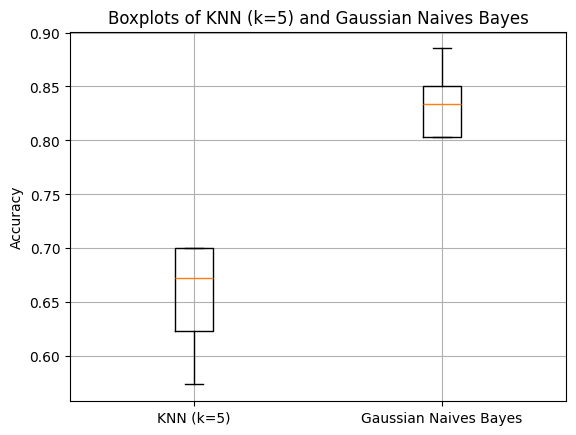

In [10]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Load the CSV dataset using pandas (correct file path)
file_path = 'heart-disease.csv'  
heart_data = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = heart_data.drop(columns=['target'])  
y = heart_data['target']  

# Define classifiers
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()

# Set up 5-fold stratified cross-validation with shuffling
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Perform cross-validation for KNN and GaussianNB
knn_scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
gnb_scores = cross_val_score(gnb, X, y, cv=cv, scoring='accuracy')

plt.boxplot([knn_scores, gnb_scores])
plt.xticks([1, 2], ['KNN (k=5)', 'Gaussian Naives Bayes'])
plt.grid(True)
plt.title('Boxplots of KNN (k=5) and Gaussian Naives Bayes')
plt.ylabel('Accuracy')


 b. [1.0v] Report the accuracy of both models, this time scaling the data with a
 Min-Max scaler before training the models. Explain the impact that this
 preprocessing step has on the performance of each model, providing an
 explanation for the results.

Text(0, 0.5, 'Accuracy')

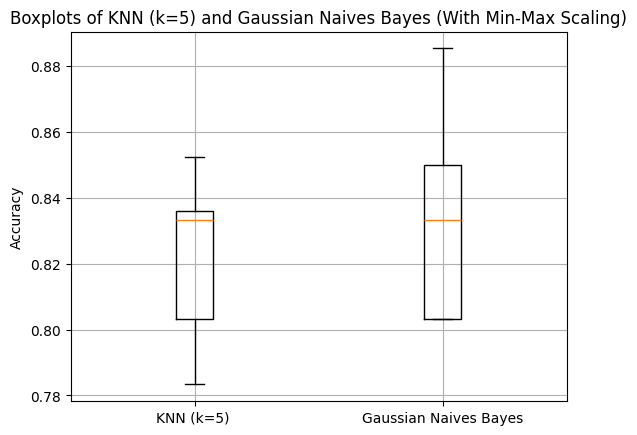

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Aplicar Min-Max Scaling aos dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Assumindo que 'X' já foi definido com seus dados

# Perform cross-validation for KNN and GaussianNB with scaled data
knn_scaled_scores = cross_val_score(knn, X_scaled, y, cv=cv, scoring='accuracy')
gnb_scaled_scores = cross_val_score(gnb, X_scaled, y, cv=cv, scoring='accuracy')


plt.boxplot([knn_scaled_scores, gnb_scaled_scores])

plt.xticks([1, 2], ['KNN (k=5) ', 'Gaussian Naives Bayes'])
plt.grid(True)
plt.title('Boxplots of KNN (k=5) and Gaussian Naives Bayes (With Min-Max Scaling)')
plt.ylabel('Accuracy')


 c. [1.0v] Using scipy, test the hypothesis “the
 𝑘𝑁𝑁
 model is statistically superior to
 naïve Bayes regarding accuracy”, asserting whether it is true.

In [16]:
from scipy import stats


# Perform a paired t-test (one-tailed)
t_stat, p_value = stats.ttest_rel(knn_scores, gnb_scores, alternative='greater')

# Adjust p-value for one-tailed test
p_value_one_tailed = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"One-tailed P-value: {p_value}")
print(f" P-value one tailed: {p_value_one_tailed}")


T-statistic: -0.7270523395133756
One-tailed P-value: 0.7462688051215336
 P-value one tailed: 0.6268655974392332


 2) Using a 80-20 train-test split, vary the number of neighbors of a
 𝑘 = {1, 5, 10, 20, 30}
 𝑘
 𝑘𝑁𝑁
 classifier using
 . Additionally, for each , train one classifier using uniform weights
 and distance weights.
 a. [1.0v] Plot the train and test accuracy for each model.

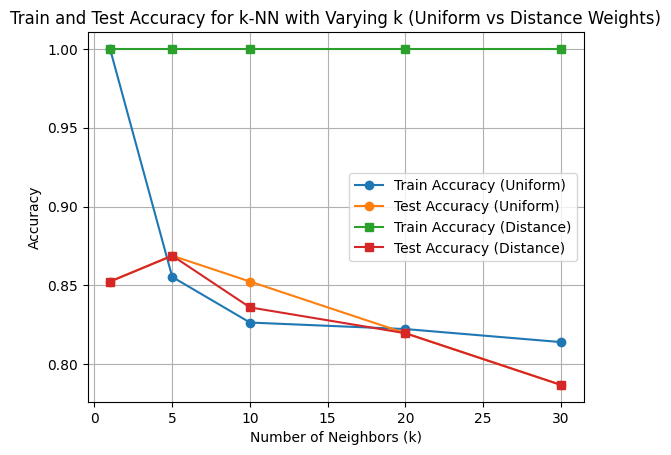

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the CSV dataset using pandas
file_path = 'heart-disease.csv'
heart_data = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Apply Min-Max scaling to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# List of k values to try
k_values = [1, 5, 10, 20, 30]

# Initialize lists to store accuracies for plotting
train_accuracy_uniform = []
test_accuracy_uniform = []
train_accuracy_distance = []
test_accuracy_distance = []

# Loop through each value of k and train two classifiers (uniform and distance)
for k in k_values:
    # Train k-NN with uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    train_accuracy_uniform.append(knn_uniform.score(X_train, y_train))
    test_accuracy_uniform.append(knn_uniform.score(X_test, y_test))

    # Train k-NN with distance weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    train_accuracy_distance.append(knn_distance.score(X_train, y_train))
    test_accuracy_distance.append(knn_distance.score(X_test, y_test))

# Plot for uniform weights
plt.plot(k_values, train_accuracy_uniform, marker='o', label='Train Accuracy (Uniform)')
plt.plot(k_values, test_accuracy_uniform, marker='o', label='Test Accuracy (Uniform)')

# Plot for distance weights
plt.plot(k_values, train_accuracy_distance, marker='s', label='Train Accuracy (Distance)')
plt.plot(k_values, test_accuracy_distance, marker='s', label='Test Accuracy (Distance)')

# Customize the plot
plt.title('Train and Test Accuracy for k-NN with Varying k (Uniform vs Distance Weights)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
